In [49]:
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last"
from importlib import reload
import pandas as pd
%load_ext autoreload
%autoreload 2
pd.set_option("display.precision",2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Heat pump

### Sizing
This is always a very difficult decision. Oversizing the heat pump means we're paying for a capacity that will never be used.   If we size the heat pump for steady state load, it will be cheaper.  However, it will be incapable of handling a morning warmup -- so if we keep our NSB project, a significant fraction of our daily heating load would be transferred onto the electric boiler, destroying much of our savings.

One additional factor to keep in mind is that in BC, only a red seal certified refrigeration tech can do work on a heat pump with over 5kw input power.  So let's size it for typical conditions.

My 99th percentile demand on a 4-hour rolling average is 5.3 kW -- that's almost certainly a warmup condition, with the house starting from cold.  So let's assume worst case -- a design load of 5.3 kW, on the coldest day of the year -- -9.3C.  A reasonably good AWHP will have a COP of only 2.2 at this temperature

$ 5.3kW\times COP \frac{1}{2.2} \times  \frac{1\:ton}{3.5\:kW} = 0.68 ton$

so would actually get away with a (tiny!) 3/4 ton heat pump.  I've never seen an AWHP of less than 3 tons.

In [50]:
df = pd.read_pickle("irradiance2014.pickle")['2013']
pre = df.copy()

# Apply the heating model
import bau
b = bau.BAU(df)
b.apply()
df = b.df

# Apply the heat pump model
import hp
reload(hp)
h = hp.HP(df)
h.apply()
df = h.df

<module 'hp' from 'C:\\Users\\aju\\Dropbox\\Exergy\\Project\\HouseModels\\hp.py'>

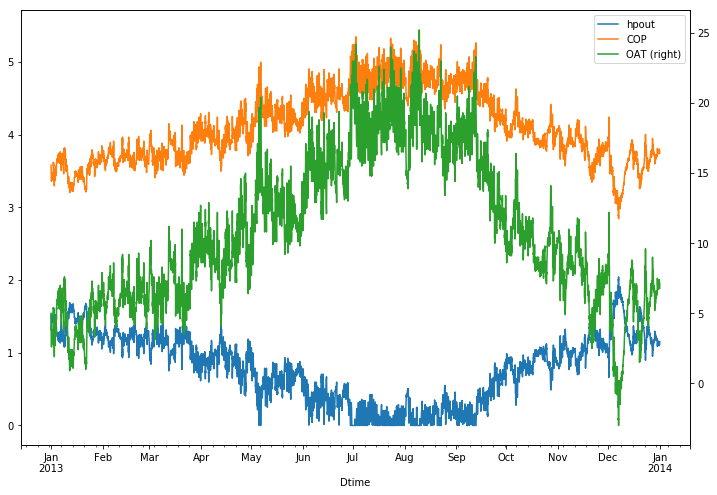

In [51]:
df[['hpout','COP','OAT']].plot(secondary_y='OAT',figsize=(12,8))